# 1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# 2.Import Dataset

In [2]:
bank=pd.read_csv('bank-full (1).csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 3.Data Understanding

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# 4.Data Preprocessing

In [9]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [11]:
data1.dtypes

age                     int64
default                object
balance                 int64
housing                object
loan                   object
day                     int64
month                  object
duration                int64
campaign                int64
pdays                   int64
previous                int64
y                      object
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
marital_divorced        uint8
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
education_unknown       uint8
contact_cellular        uint8
contact_telephone       uint8
contact_un

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
data1['y']=lb.fit_transform(data1['y'])
data1['month']=lb.fit_transform(data1['month'])
data1['default']=lb.fit_transform(data1['default'])
data1['housing']=lb.fit_transform(data1['housing'])
data1['loan']=lb.fit_transform(data1['loan'])

In [14]:
data1.dtypes

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
month                  int32
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_failu

In [15]:
data1.shape

(45211, 38)

# 5.Model Building

In [16]:
X=data1.drop(labels='y',axis=1)
y=data1.y

In [17]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state =454,stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression

# 6.Model Training

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# 7.Model Testing

### training data

In [30]:
y_pred_train=model.predict(X_train)

### test data

In [31]:
y_pred_test=model.predict(X_test)

# 8.Model Evalution

### training data

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [33]:
confusion_matrix(y_train,y_pred_train)

array([[31328,   609],
       [ 3431,   800]], dtype=int64)

In [34]:
accuracy_score(y_train,y_pred_train)

0.8882990488829905

In [35]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     31937\n           1       0.57      0.19      0.28      4231\n\n    accuracy                           0.89     36168\n   macro avg       0.73      0.59      0.61     36168\nweighted avg       0.86      0.89      0.86     36168\n'

In [36]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.5850059019601245


Text(0, 0.5, 'True Positive Rate')

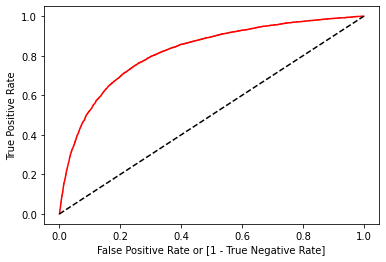

In [37]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### testing data

In [38]:
confusion_matrix(y_test,y_pred_test)

array([[7806,  179],
       [ 866,  192]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_test)

0.8844410040915626

In [41]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     31937\n           1       0.57      0.19      0.28      4231\n\n    accuracy                           0.89     36168\n   macro avg       0.73      0.59      0.61     36168\nweighted avg       0.86      0.89      0.86     36168\n'

Text(0, 0.5, 'True Positive Rate')

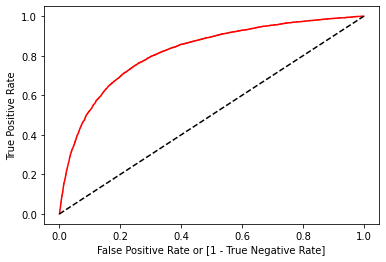

In [42]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Feature selection

In [43]:
from sklearn.feature_selection import mutual_info_classif
#mdetermine the mutual information
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([1.10164027e-02, 6.79680854e-05, 2.21688815e-02, 1.27754041e-02,
       2.21238378e-03, 4.93955673e-03, 2.65003691e-02, 7.22132244e-02,
       8.19287812e-03, 2.48768294e-02, 1.38211777e-02, 0.00000000e+00,
       4.08317229e-03, 8.91895444e-05, 2.52048175e-03, 1.39610966e-03,
       1.41108666e-03, 2.19518651e-03, 0.00000000e+00, 2.66097365e-03,
       0.00000000e+00, 0.00000000e+00, 3.02892686e-03, 0.00000000e+00,
       4.03541583e-03, 4.78812394e-04, 4.10515289e-03, 4.33773372e-03,
       4.89177858e-03, 0.00000000e+00, 8.93683568e-03, 0.00000000e+00,
       1.65805204e-02, 4.68479144e-04, 3.44416898e-03, 2.94869336e-02,
       1.42944911e-02])

In [44]:
mutual_info_ser=pd.Series(mutual_info)
mutual_info_ser.index=X_train.columns
mutual_sort=mutual_info_ser.sort_values(ascending=False)

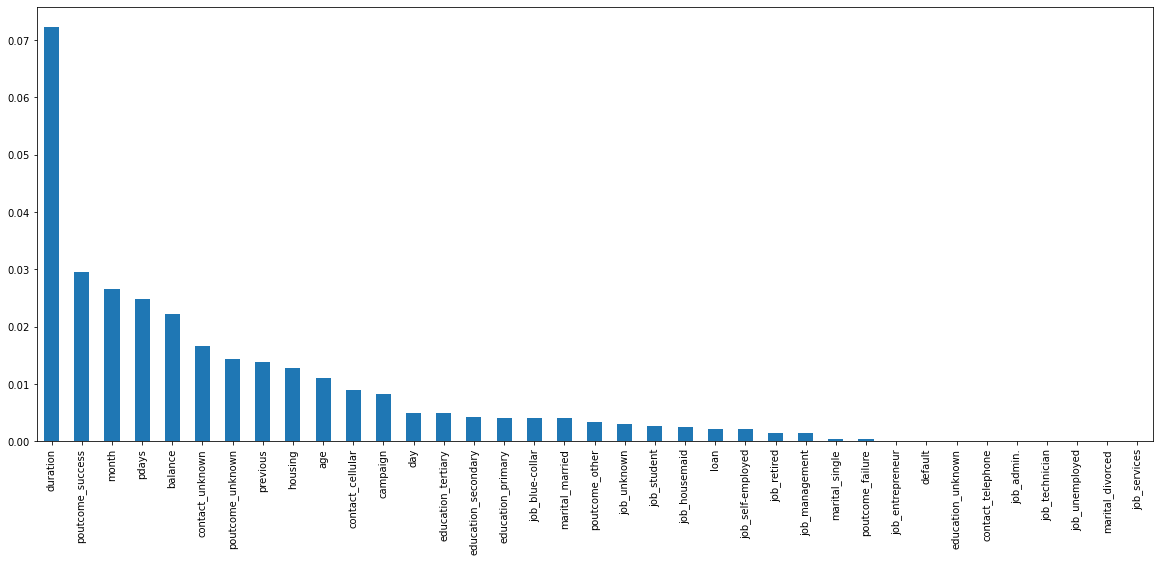

In [45]:
mutual_sort.plot.bar(figsize=(20,8))
plt.show()

In [46]:
from sklearn.feature_selection import SelectKBest

In [47]:
sel_top_10=SelectKBest(mutual_info_classif,k=10)
sel_top_10.fit(X_train,y_train)
X_train.columns[sel_top_10.get_support()]

Index(['age', 'balance', 'housing', 'month', 'duration', 'pdays',
       'contact_cellular', 'contact_unknown', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [49]:
X.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [54]:
X_train.drop( ['default', 'loan', 'day', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'poutcome_failure', 'poutcome_other'],axis=1)
X_test.drop( ['default', 'loan', 'day', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'poutcome_failure', 'poutcome_other'],axis=1)


,age,balance,housing,month,duration,pdays,contact_cellular,contact_unknown,poutcome_success,poutcome_unknown
42457,49,307,0,2,854,-1,1,0,0,1
45034,33,718,1,10,104,111,1,0,1,0
33973,29,231,0,0,80,-1,1,0,0,1
23410,34,-1,0,1,787,-1,1,0,0,1
1986,41,1696,1,8,878,-1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
14693,31,303,1,5,196,-1,1,0,0,1
23481,32,27,0,1,146,-1,1,0,0,1
24282,39,313,1,9,125,-1,1,0,0,1
6214,55,1004,1,8,224,-1,0,1,0,1


# Final Model

In [55]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

### Train data

In [56]:
y_pred_train=model.predict(X_train)

In [57]:
confusion_matrix(y_train,y_pred_train)

array([[31328,   609],
       [ 3431,   800]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_test)

0.8844410040915626

In [59]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     31937\n           1       0.57      0.19      0.28      4231\n\n    accuracy                           0.89     36168\n   macro avg       0.73      0.59      0.61     36168\nweighted avg       0.86      0.89      0.86     36168\n'

In [60]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.5850059019601245


### Test data

In [64]:
y_pred_test=model.predict(X_test)

In [65]:
confusion_matrix(y_test,y_pred_test)

array([[7806,  179],
       [ 866,  192]], dtype=int64)

In [66]:
accuracy_score(y_test,y_pred_test)

0.8844410040915626

In [67]:
classification_report(y_train,y_pred_train)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     31937\n           1       0.57      0.19      0.28      4231\n\n    accuracy                           0.89     36168\n   macro avg       0.73      0.59      0.61     36168\nweighted avg       0.86      0.89      0.86     36168\n'

# Even though we had done feature selection accuracy not increased